# Latar Belakang Masalah
**Pemilik Apartemen**

Apartemen merupakan salah satu solusi untuk memenuhi kebutuhan hunian masyarakat modern, terutama di tengah keterbatasan lahan dan padatnya aktivitas bisnis di wilayah perkotaan. Selain digunakan sebagai tempat tinggal, apartemen juga menjadi aset investasi yang menjanjikan. Oleh karena itu, baik individu maupun perusahaan pemilik apartemen sering menawarkan unit mereka untuk dijual kembali dengan tujuan memperoleh keuntungan dari transaksi jual-beli properti.

Namun, menentukan harga jual apartemen bukanlah hal yang mudah. Banyak pemilik unit menghadapi kesulitan dalam menetapkan harga yang tepat saat ingin menjual apartemennya. Berbagai pertanyaan sering muncul, seperti:

Faktor apa saja yang menjadi dasar dalam pembentukan harga apartemen?

Apakah bentuk dan jenis apartemen memengaruhi tinggi atau rendahnya harga jual?

Apakah semakin banyak fasilitas akan membuat harga apartemen semakin mahal?

Apakah usia bangunan juga menjadi faktor yang memengaruhi nilai jual apartemen?

Pertanyaan-pertanyaan tersebut sangat penting bagi pemilik apartemen. Jika harga yang ditetapkan terlalu tinggi dibandingkan harga pasar, unit akan sulit terjual. Bahkan, apabila tidak terjual dalam jangka waktu lama, pemilik khawatir nilai apartemen akan menurun karena dianggap sebagai bangunan yang sudah tua. Sebaliknya, jika harga yang ditetapkan terlalu rendah, pemilik juga berisiko tidak memperoleh keuntungan yang maksimal.

**Pembeli Apartemen**

Di sisi lain, terdapat pula individu maupun perusahaan yang berniat membeli apartemen, baik untuk hunian maupun sebagai investasi. Kelompok ini juga menghadapi permasalahan serupa dalam menentukan apakah harga yang ditawarkan sudah sesuai dengan harga pasar. Dari sudut pandang pembeli apartemen:
- Mereka khawatir penjual menawarkan unit dengan harga yang lebih tinggi dari nilai pasar sebenarnya.
- Terutama bagi pembeli yang bertujuan untuk investasi, mereka cenderung ingin mencari peluang dengan memperoleh unit di bawah harga pasar agar dapat memperoleh keuntungan di masa depan.

Melihat berbagai permasalahan tersebut, saya mencoba memanfaatkan Machine Learning sebagai solusi untuk membantu menentukan harga apartemen secara lebih objektif dan akurat. Dengan menggunakan Machine Learning, diharapkan dapat ditemukan pola-pola yang memengaruhi harga apartemen berdasarkan berbagai faktor, seperti lokasi, fasilitas, usia bangunan, dan karakteristik unit lainnya.

Pada penelitian ini, saya memilih untuk menganalisis pasar apartemen di Korea Selatan, karena adanya kesempatan kerja sama dengan sebuah perusahaan properti di Korea yang bergerak di bidang jual-beli apartemen. Hasil analisis ini diharapkan dapat membantu perusahaan tersebut dalam:
- Menentukan harga jual apartemen secara lebih tepat,
- Mengurangi risiko salah penetapan harga, dan
- Memaksimalkan keuntungan dalam transaksi jual-beli properti.

Karena tujuan utama penelitian ini adalah untuk menemukan pola hubungan antara berbagai faktor dengan harga apartemen, maka model yang digunakan adalah **Linear Regression** sebagai salah satu metode dalam Machine Learning yang sesuai untuk menganalisis hubungan linier antar variabel.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import geopandas as gpd

# Data Understanding
Untuk melihat apakah data yang dimiliki ada missing atau duplicated data dan mengerti isi data untuk mempersiapkan data ke tahap analisis machine learning

In [2]:
# Load dataset dan meilihat jumlah baris dan kolom dalam dataset
df = pd.read_csv('data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


Data memiliki 4123 Baris data dengan 11 kolom data

In [3]:
# Melihat apakah ada missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


Dilihat dari Non-Null Count terlihat bahwa tidak ada missing value

In [4]:
# Menampilkan data apa saja yang terdapat di masing-masing kolom (untuk melihat apakah ada yang mengisi data secara asal atau mengisi data dengan tidak sesuai konteks kolomnya)
pd.set_option('display.max_colwidth', None)

# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(
    columns=['Column Name',
             'Number of Unique',
             'Unique Sample'],
             data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


Dari sini terlihat tidak ada kolom data yang diisi tidak sesuai dengan konteks kolom tersebut (contoh: - , ?)

In [5]:
# Menampilkan dan mengelompokkan baris data yang duplikat untuk memudahkan pemahaman data

df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
385,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,126548
1428,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,126548
628,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,128318
3810,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,128318
258,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,212389
...,...,...,...,...,...,...,...,...,...,...,...
1946,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,265442
2136,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,265442
3511,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,265442
3600,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,265442


In [6]:
# Menampilkan dan mengelompokkan baris data yang duplikat kecuali data last tidak termasuk ke data duplikat

df[df.duplicated(keep='last')].sort_values(by=df.columns.tolist())

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
385,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,126548
628,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,128318
258,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,212389
547,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,218584
3005,corridor,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,0.0,1978,3,903,221238
...,...,...,...,...,...,...,...,...,...,...,...
1147,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,265442
1946,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,265442
2136,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,265442
3511,terraced,no_bus_stop_nearby,no_subway_nearby,2.0,2.0,1.0,203.0,2009,5,1160,265442


Terdapat 2100 baris data yang datanya terduplikat, dari **2100 baris data** tersebut data yang terduplikat saja yang akan saya hapus yaitu **1422 baris data**

## Data Manipulation and Preparation
Proses ini bertujuan untuk lebih membantu saya memahami data karena data sudah bersih (sesudah mendelete 1422 baris data duplikat). Selain itu, data yang sudah bersih juga bisa langsung dipakai untuk pembuatan machine learning

In [7]:
# Copy data supaya pembersihan data ini tidak mengubah data asli
df_2 = df.copy()

In [8]:
# Mendelete baris yang duplikat
df_2 = df_2.drop_duplicates(keep='last')

In [9]:
# Mengubah kolom 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)', 'N_Parkinglot(Basement)' menjadi integer

df_2 = df_2.astype({
    'N_FacilitiesNearBy(ETC)':'int',
    'N_FacilitiesNearBy(PublicOffice)':'int',
    'N_SchoolNearBy(University)': 'int',
    'N_Parkinglot(Basement)':'int'
})

In [10]:
# Data setelah dibersihkan
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 2 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   SubwayStation                     2701 non-null   object
 3   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 5   N_SchoolNearBy(University)        2701 non-null   int64 
 6   N_Parkinglot(Basement)            2701 non-null   int64 
 7   YearBuilt                         2701 non-null   int64 
 8   N_FacilitiesInApt                 2701 non-null   int64 
 9   Size(sqf)                         2701 non-null   int64 
 10  SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 253.2+ KB


In [11]:
# Menampilkan kembali data setelah delete data duplikat dan mengubah jenis data

pd.set_option('display.max_colwidth', None)

# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df_2[col].nunique(), df_2[col].unique()])

tabel1Desc = pd.DataFrame(
    columns=['Column Name',
             'Number of Unique',
             'Unique Sample'],
             data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[mixed, terraced, corridor]"
1,TimeToSubway,5,"[15min~20min, 0-5min, 5min~10min, no_bus_stop_nearby, 10min~15min]"
2,SubwayStation,8,"[Chil-sung-market, Sin-nam, Bangoge, no_subway_nearby, Kyungbuk_uni_hospital, Myung-duk, Banwoldang, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[1, 0, 5, 2]"
4,N_FacilitiesNearBy(PublicOffice),8,"[7, 1, 5, 2, 3, 6, 4, 0]"
5,N_SchoolNearBy(University),6,"[3, 2, 4, 1, 5, 0]"
6,N_Parkinglot(Basement),20,"[56, 536, 798, 203, 0, 1174, 930, 475, 605, 400, 218, 1321, 524, 1270, 76, 108, 181, 18, 184, 79]"
7,YearBuilt,16,"[1997, 2006, 2005, 2009, 1986, 2014, 2013, 2008, 1993, 2007, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[5, 7, 4, 9, 8, 1, 10, 3, 2]"
9,Size(sqf),89,"[558, 1743, 572, 910, 1131, 843, 914, 829, 644, 743, 1273, 156, 1412, 1394, 1690, 903, 868, 676, 1387, 1419, 640, 1184, 1167, 355, 818, 206, 1377, 2337, 1629, 451, 1334, 587, 1643, 811, 508, 1366, 281, 1327, 1103, 907, 135, 857, 1928, 1149, 1088, 1288, 1483, 1761, 1160, 1437, 576, 1291, 2092, 636, 814, 288, 871, 1092, 1444, 1451, 1448, 426, 1313, 1256, 1796, 1192, 1519, 1035, 846, 2056, 273, 277, 779, 498, 1252, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


In [12]:
df_2.describe(include='all')

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701,2701,2701,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
unique,3,5,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,terraced,0-5min,Myung-duk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1667,1248,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.890411,4.027027,2.680489,533.746390,2002.358386,5.713439,984.028878,229511.365790
std,NaN,NaN,NaN,2.153168,1.887486,1.504470,418.224859,9.151949,2.386552,391.982619,105079.891321
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,NaN,NaN,NaN,0.000000,3.000000,2.000000,181.000000,1993.000000,4.000000,743.000000,153539.000000
50%,NaN,NaN,NaN,1.000000,4.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,221238.000000
75%,NaN,NaN,NaN,5.000000,5.000000,4.000000,798.000000,2007.000000,7.000000,1167.000000,300884.000000


## Kesimpulan dari Dataset
Berdasarkan Scanning Data, maka kesimpulan saya sebagai berikut:
- Dataset **data_daegu_apartment.csv** memiliki 4123 baris dan 11 kolom data.
- Dataset tidak memiliki missing value
- Data dalam dataset sudah terisi sesuai dengan konteks masing-masing kolom
- Dataset memiliki duplicated data sebanyak 1422 baris data.

Isi data dari setiap kolom data:
- **Hallway Type**: Tipe koridor apartemen, terdapat 3 tipe koridor dalam apartemen yaitu **Terraced, Mixed, Corridor**, dengan paling banyak jenis apartemennya adalah **Terraced**.
- **TimeToSubway**: Waktu yang dibutuhkan untuk mencapai stasiun subway terdekat, terdapat 3 kelompok waktu yaitu **0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby**, dengan paling banyak apartemen menawarkan fasilitas **0-5min** untuk ke stasiun subway terdekat.
- **SubwayStation**: Nama stasiun subway terdekat, terdapat 8 stasiun subway yaitu **Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu**, Lokasi apartemen paling banyak ada di sekitar stasiun subway **Myung-duk**.
- **N_FacilitiesNearBy (ETC)**: Jumlah fasilitas umum di sekitar apartemen, yaitu dari **0 (tidak ada) sampai jumlah fasilitas yang paling banyak ada di 5**.
- **N_FacilitiesNearBy (PublicOffice)**: Jumlah fasilitas kantor pemerintahan di sekitar apartemen, yaitu dari **0 (tidak ada) sampai paling banyak fasilitas kantor pemerintahan di sekitar apartemen adalah 7**.
- **N_SchoolNearBy (University)**: Jumlah universitas di sekitar apartemen, yaitu dari **0 (tidak ada) sampai paling banyak jumlah universitas di sekitar apartemen adalah 5**.
- **N_Parkinglot (Basement)**: Jumlah tempat parkir di basement, yaitu dari **0 (tidak ada) sampai paling banyak ada terdapat 1321 slot parkir**.
- **YearBuilt**: Tahun pembangunan apartemen, yaitu paling lama adalah bangunan yang dibangun pada tahun **1978** dan bangunan paling baru dibangun pada tahun **2015**.
- **N_FacilitiesInApt**: Jumlah fasilitas yang tersedia di dalam apartemen, yaitu **paling sedikit ada 1** dan **paling banyak ada 10 jenis fasilitas**.
- **Size (sqft)**: Luas apartemen (dalam kaki persegi), dengan apartemen yang **luas paling kecil adalah 135 sqf** dan **paling luas adalah 2337 sqf**.
- **SalePrice**: Harga jual apartemen (Won), dimana apartemen **paling murah seharga 32,743 won** dan **paling mahal seharga 585,840 won**.

**Arti Tambahan mengenai hallway Type**

1️⃣ Terraced Type (Koridor Teras Terbuka) = rumah bertingkat yang setiap unitnya punya teras sendiri
- Ciri visual utama:
  - Tidak ada lorong panjang
  - Banyak area terbuka
  - Mirip rumah tapak tapi disusun vertikal
  - 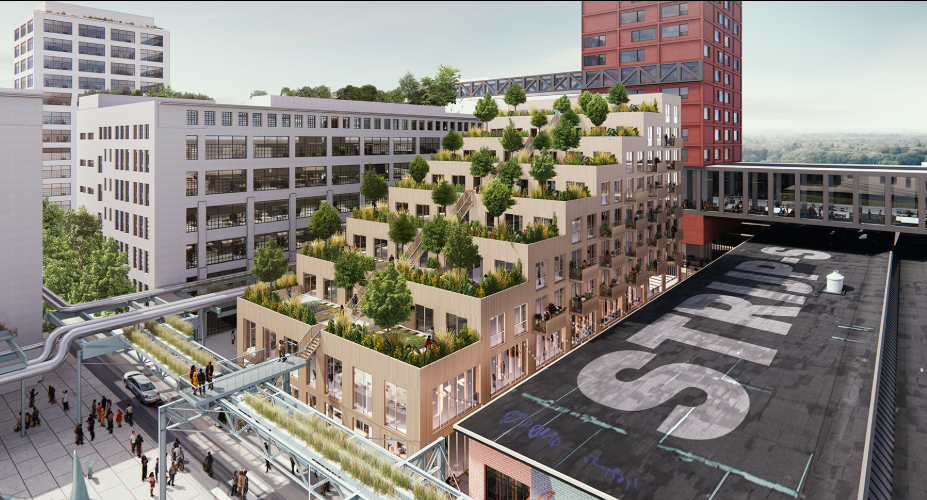

2️⃣ Corridor Type (Koridor Dalam / Lorong Panjang)
- Ciri visual utama:
  - Lorong sempit & panjang
  - Pintu unit berhadap-hadapan
  - Lampu menyala sepanjang lorong
  - mirip lorong hotel
  - 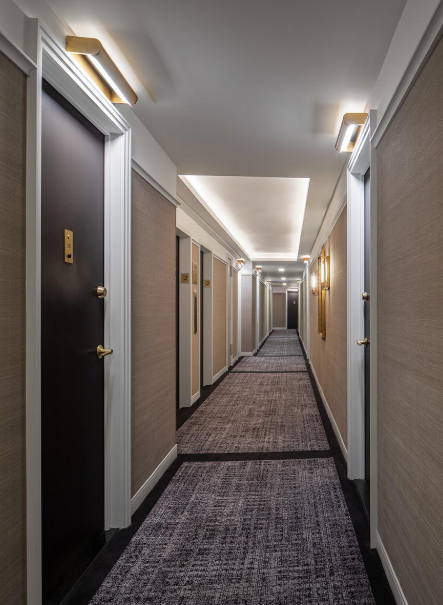

3️⃣ Mixed Type (Koridor Setengah Terbuka) = lorong tapi satu sisi terbuka
- Ciri visual utama:
  - Masih ada lorong, tapi satu sisi terbuka ke luar
  - Angin & cahaya masuk dari samping
  - 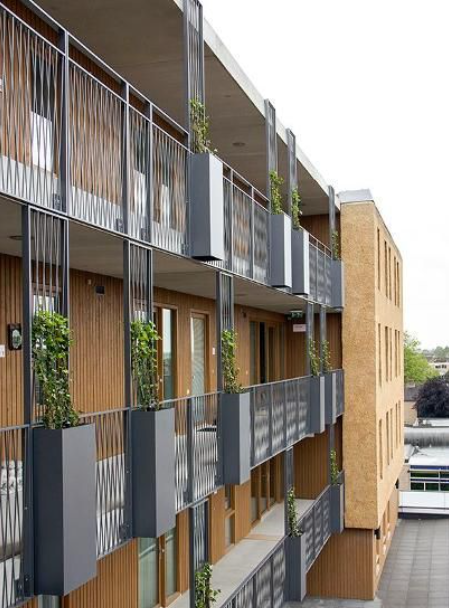


# Pemahaman Data Tambahan

### Outlier data pada Harga Apartemen (SalePrice)

In [13]:
# Melihat Batas atas dan Batas bawah dari dataset untuk melihat data outlier dari SalePrice
Q1 = np.percentile(df_2['SalePrice'], 25)
Q3 = np.percentile(df_2['SalePrice'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Batas bawah:", lower_bound)
print("Batas atas:", upper_bound)

Q1: 153539.0
Q3: 300884.0
IQR: 147345.0
Batas bawah: -67478.5
Batas atas: 521901.5


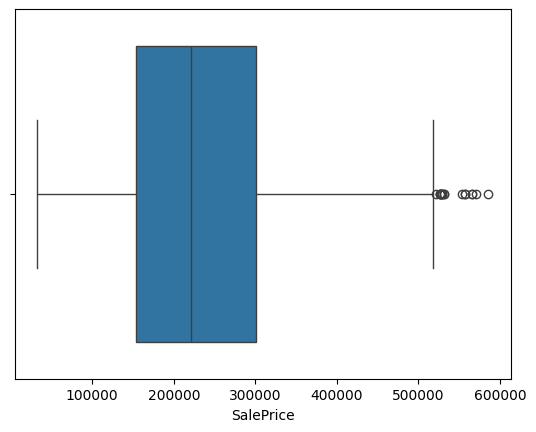

In [14]:
# Plot distribusi fitur 'price'
sns.boxplot(df_2, x='SalePrice')
plt.show()

In [15]:
display(df_2.loc[df_2['SalePrice'] > 521901.5])

print(f"Jumlah Apartemen yang Harganya diatas batas atas (Outlier atau > 521,901.5 won) adalah sebanyak {len(df_2[df_2['SalePrice'] > 521901.5])} apartemen")

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
204,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,566371
549,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,553097
656,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,528318
1180,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,530973
1295,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1519,526548
1895,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,522123
1998,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,526548
2100,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1519,530973
2128,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,585840


Jumlah Apartemen yang Harganya diatas batas atas (Outlier atau > 521,901.5 won) adalah sebanyak 17 apartemen


### Distribusi Harga Apartemen (SalePrice)

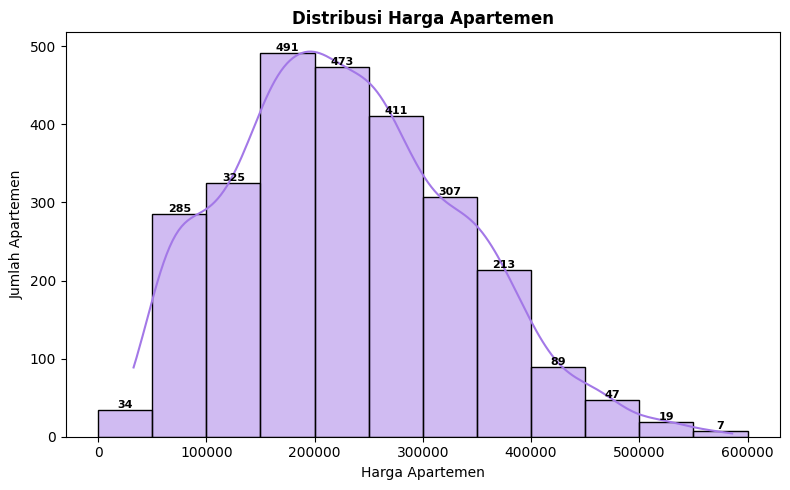

In [16]:
plt.figure(figsize=(8,5))
bins = range(0, 650000, 50000)

bars = sns.histplot(df_2['SalePrice'], bins=bins, color="#A378E7D2", kde=True)
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width()/2,
        height,
        int(height),
        ha='center',
        va='bottom',
        fontsize=8,
        fontweight='bold'
    )
plt.title('Distribusi Harga Apartemen', fontweight='bold')
plt.xlabel('Harga Apartemen')
plt.ylabel('Jumlah Apartemen')
plt.tight_layout()
plt.show()

Distribusi Harga Apartemen (SalePrice) adalah Right Skewed (Mean > Median) dimana apartemen paling banyak berada di rentang harga 151,000 - 200,000 won (sebanyak 491 unit apartemen) dan 201,000 - 250,000 won (sebanyak 473,000 unit apartemen).

### Jumlah Apartemen dan Harga Apartemen berdasarkan Tipe Coridor ('HallwayType')

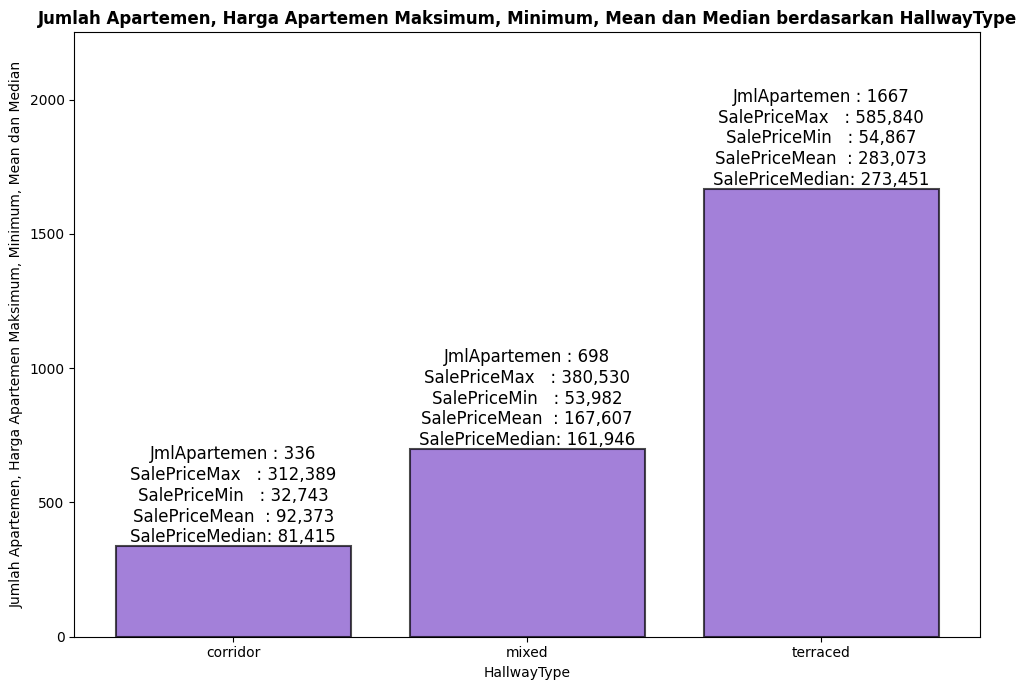

In [17]:
# Jumlah Apartemen dan Harga Berdasarkan Coridor

summary = df_2.groupby('HallwayType').agg(
    Total_Apartemen=('SalePrice', 'count'),
    Max_SalePrice=('SalePrice', 'max'),
    Min_SalePrice=('SalePrice', 'min'),
    Mean_SalePrice=('SalePrice', 'mean'),
    Median_SalePrice=('SalePrice', 'median')
).reset_index()


plt.figure(figsize=(10,7))

bars = plt.bar(
    summary['HallwayType'],
    summary['Total_Apartemen'],
    color="#7C4BCAD2",
    edgecolor='black',
    linewidth=1.5,
    alpha=0.7
)

plt.title('Jumlah Apartemen, Harga Apartemen Maksimum, Minimum, Mean dan Median berdasarkan HallwayType', fontweight='bold')
plt.xlabel('HallwayType')
plt.ylabel('Jumlah Apartemen, Harga Apartemen Maksimum, Minimum, Mean dan Median')

# Tambahkan ruang di atas bar
plt.ylim(0, summary['Total_Apartemen'].max() * 1.35)

# Tambahkan teks statistik SalePrice di atas bar
for bar, _, row in zip(bars, summary['HallwayType'], summary.itertuples()):
    height = bar.get_height()
    
    text = (
        f"JmlApartemen : {row.Total_Apartemen}\n"
        f"SalePriceMax   : {row.Max_SalePrice:,.0f}\n"
        f"SalePriceMin   : {row.Min_SalePrice:,.0f}\n"
        f"SalePriceMean  : {row.Mean_SalePrice:,.0f}\n"
        f"SalePriceMedian: {row.Median_SalePrice:,.0f}"
    )
    
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        text,
        ha='center',
        va='bottom',
        fontsize=12,
        clip_on=False
    )

plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()


Dari Grafik ini jenis apartemen paling banyak di Korea adalah unit apartemen dengan jenis koridor **Terranced** dan jika dilihat dari **SalePriceMin dan SalePriceMedian** dapat disimpulkan bahwa unit Apartemen dengan Terraced Coridor harga jual Apartemen lebih tinggi dibandingkan dengan jenis koridor lainnya.

### Jumlah Apartemen dan Harga Apartemen berdasarkan Jarak ke Subway ('TimeToSubway')

C:\Users\Vivi04\AppData\Local\Temp\ipykernel_9980\2100660374.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_2.groupby('TimeToSubway').agg(


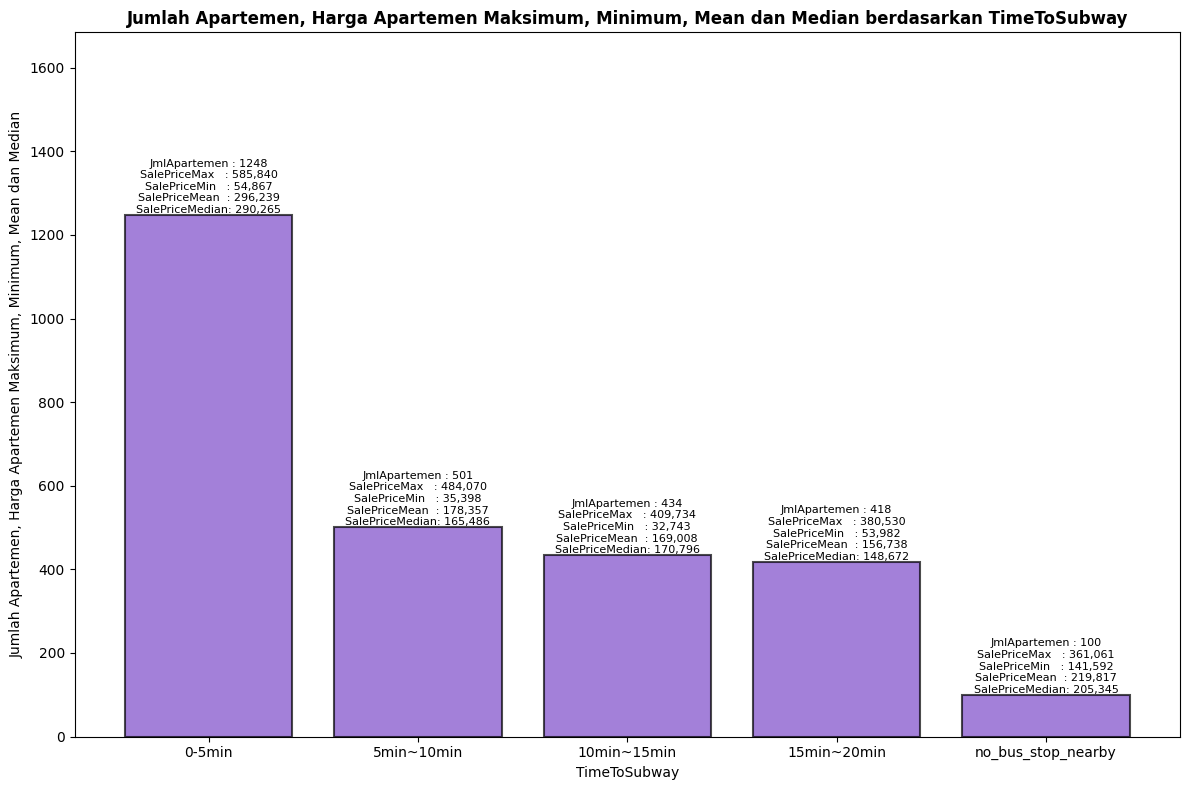

In [18]:
# Jumlah Apartemen dan Harga Berdasarkan TimeToSubway

df_2['TimeToSubway'] = pd.Categorical(
    df_2['TimeToSubway'],
    categories=[
        '0-5min', '5min~10min', '10min~15min', '15min~20min', 'no_bus_stop_nearby'],
    ordered=True
)

summary = df_2.groupby('TimeToSubway').agg(
    Total_Apartemen=('SalePrice', 'count'),
    Max_SalePrice=('SalePrice', 'max'),
    Min_SalePrice=('SalePrice', 'min'),
    Mean_SalePrice=('SalePrice', 'mean'),
    Median_SalePrice=('SalePrice', 'median')
).reset_index()


plt.figure(figsize=(12,8))

bars = plt.bar(
    summary['TimeToSubway'],
    summary['Total_Apartemen'],
    color="#7C4BCAD2",
    edgecolor='black',
    linewidth=1.5,
    alpha=0.7
)

plt.title('Jumlah Apartemen, Harga Apartemen Maksimum, Minimum, Mean dan Median berdasarkan TimeToSubway', fontweight='bold')
plt.xlabel('TimeToSubway')
plt.ylabel('Jumlah Apartemen, Harga Apartemen Maksimum, Minimum, Mean dan Median')

# Tambahkan ruang di atas bar
plt.ylim(0, summary['Total_Apartemen'].max() * 1.35)

# Tambahkan teks statistik SalePrice di atas bar
for bar, _, row in zip(bars, summary['TimeToSubway'], summary.itertuples()):
    height = bar.get_height()
    
    text = (
        f"JmlApartemen : {row.Total_Apartemen}\n"
        f"SalePriceMax   : {row.Max_SalePrice:,.0f}\n"
        f"SalePriceMin   : {row.Min_SalePrice:,.0f}\n"
        f"SalePriceMean  : {row.Mean_SalePrice:,.0f}\n"
        f"SalePriceMedian: {row.Median_SalePrice:,.0f}"
    )
    
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        text,
        ha='center',
        va='bottom',
        fontsize=8,
        clip_on=False
    )

plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()


Dari grafik ini, Apartemen paling banyak terletak di **0-5 min** jarak dengan stasiun subway terdekat. Jika dilihat dari **SalePriceMin dan SalePriceMedian** dapat disimpulkan kesimpulan sementara bahwa dengan semakin dekatnya lokasi apartemen ke Subway belum tentu Harga Apartemen akan semakin mahal karena yang **tidak ada stasiun subway terdekat saja, minimal harga jual apartemen dimulai dari harga 141,592 won** dan yang jarak apartemen ke stasiun subway terdekat membutuhkan **waktu 15-20min minimal harga jual apartemen seharga 53,982 won**. Harga minimal ini hanya berbeda sedikit dengan harga apartemen yang paling murah tetapi hanya **berjarak 0-5min ke stasiun subway terdeka, yaitu seharga 54,867 won**

In [19]:
# Melihat lebih jelas data apartemen seperti apa yang tidak ada subway disekitarnya

df_2[df_2['TimeToSubway'] == 'no_bus_stop_nearby']

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
8,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,172566
117,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,147141
193,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,162831
242,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,1160,355752
293,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,914,178761
...,...,...,...,...,...,...,...,...,...,...,...
4073,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,1160,265442
4092,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,225663
4094,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,175681
4095,terraced,no_bus_stop_nearby,no_subway_nearby,2,2,1,203,2009,5,910,203646


In [20]:
# 'HallwayType' dan 'SubwayStation'

df_2[df_2['TimeToSubway'] == 'no_bus_stop_nearby'].describe(include='all')

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,100,100,100,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000
unique,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,terraced,no_bus_stop_nearby,no_subway_nearby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,100,100,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.0,2.0,1.0,203.0,2009.0,5.0,980.320000,219816.960000
std,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,112.619757,53257.793378
min,NaN,NaN,NaN,2.0,2.0,1.0,203.0,2009.0,5.0,910.000000,141592.000000
25%,NaN,NaN,NaN,2.0,2.0,1.0,203.0,2009.0,5.0,910.000000,184512.500000
50%,NaN,NaN,NaN,2.0,2.0,1.0,203.0,2009.0,5.0,910.000000,205345.000000
75%,NaN,NaN,NaN,2.0,2.0,1.0,203.0,2009.0,5.0,1160.000000,262922.250000


Apartemen yang tidak memiliki stasiun subway di sekitarnya adalah jenis apartemen dengan koridor Terraced dimana apartemen yang paling murah (141,592 won) memiliki:
- 2 Fasilitas Umum
- 2 kantor pemerintahan
- 1 Universitas
- 203 slot parkir
- tahun bangunan didirikan adalah 2009
- fasilitas yang disediakan apartemen ada 5 jenis
- luas paling kecil minimal 910 sqf

### Jumlah dan Harga Apartemen berdasarkan lokasi (SubwayStation)

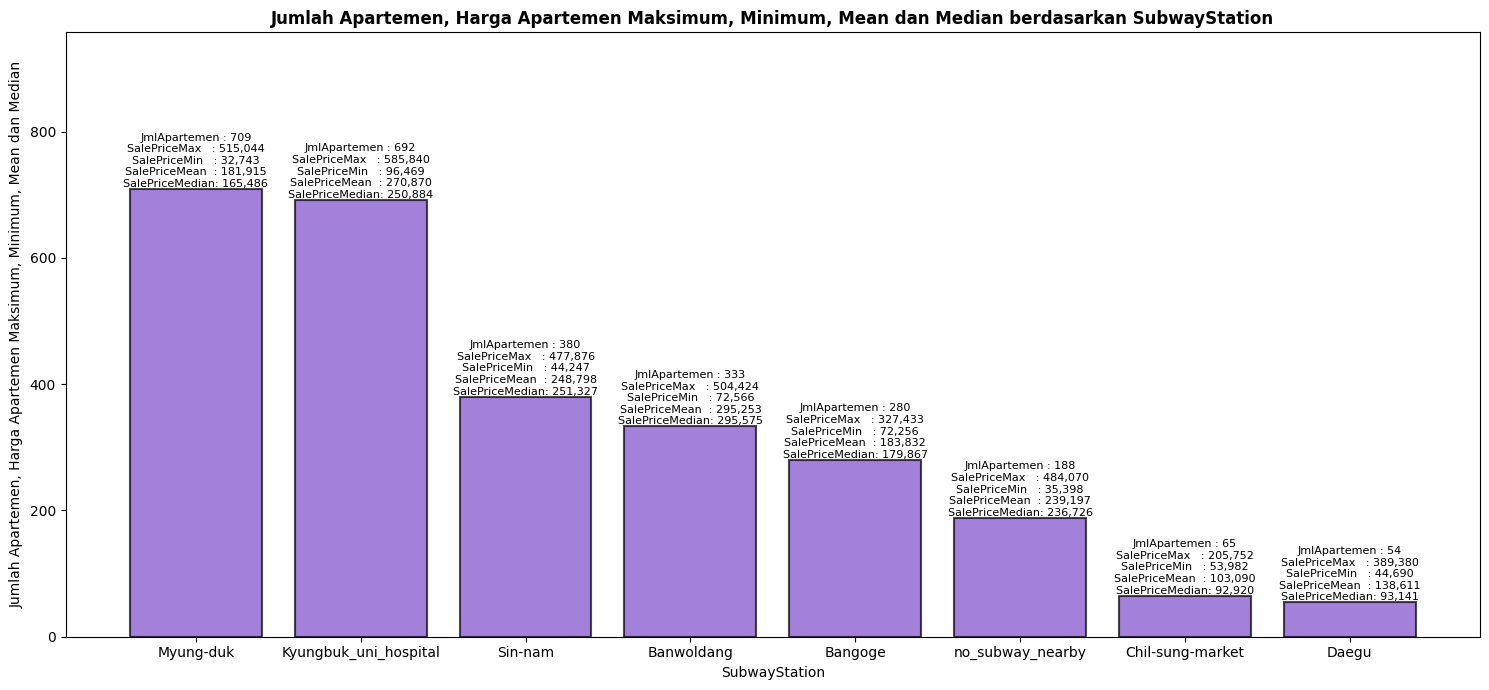

In [21]:
# Jumlah Apartemen dan Harga Berdasarkan SubwayStation

summary = df_2.groupby('SubwayStation').agg(
    Total_Apartemen=('SalePrice', 'count'),
    Max_SalePrice=('SalePrice', 'max'),
    Min_SalePrice=('SalePrice', 'min'),
    Mean_SalePrice=('SalePrice', 'mean'),
    Median_SalePrice=('SalePrice', 'median')
).reset_index().sort_values(by='Total_Apartemen', ascending=False)


plt.figure(figsize=(15,7))

bars = plt.bar(
    summary['SubwayStation'],
    summary['Total_Apartemen'],
    color="#7C4BCAD2",
    edgecolor='black',
    linewidth=1.5,
    alpha=0.7
)

plt.title('Jumlah Apartemen, Harga Apartemen Maksimum, Minimum, Mean dan Median berdasarkan SubwayStation', fontweight='bold')
plt.xlabel('SubwayStation')
plt.ylabel('Jumlah Apartemen, Harga Apartemen Maksimum, Minimum, Mean dan Median')

# Tambahkan ruang di atas bar
plt.ylim(0, summary['Total_Apartemen'].max() * 1.35)

# Tambahkan teks statistik SalePrice di atas bar
for bar, _, row in zip(bars, summary['SubwayStation'], summary.itertuples()):
    height = bar.get_height()
    
    text = (
        f"JmlApartemen : {row.Total_Apartemen}\n"
        f"SalePriceMax   : {row.Max_SalePrice:,.0f}\n"
        f"SalePriceMin   : {row.Min_SalePrice:,.0f}\n"
        f"SalePriceMean  : {row.Mean_SalePrice:,.0f}\n"
        f"SalePriceMedian: {row.Median_SalePrice:,.0f}"
    )
    
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        text,
        ha='center',
        va='bottom',
        fontsize=8,
        clip_on=False
    )

plt.xticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()


Berdasarkan grafik ini maka terlihat bahwa:
- paling banyak Apartemen terletak di daerah dekat Myung-duk Subway Station, yaitu sebanyak 709 unit Apartemen.
- Apartemen sekitar Myung-duk ini juga menawarkan harga apartemen paling murah adalah 32,743 won (SalePriceMin).
- Kyungbuk_uni_hospital subway stasion adalah lokasi kedua yang apartemennya paling banyak, yaitu sebanyak 692 unit Apartemen.
- Apartemen sekitar Kyungbuk_uni_hospital subway stasion menawarkan harga apartemen paling mudah adalah 96,469 won, angka awal ini cukup tinggi dibandingkan dengan apartemen di lokasi lainnya.

### List Apartemen yang paling mahal

In [22]:
df_2.nlargest(20, 'SalePrice')

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
2128,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,585840
2918,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,570796
204,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,566371
3545,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,557522
3949,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,556637
549,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,553097
1180,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1643,530973
2100,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1519,530973
3868,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1928,529203


Dari List ini dapat disimpulkan bahwa Harga Jual Apartemen tertinggi adalah:
- Jenis Koridor adalah Terraced
- Jarak ke stasiun subway terdekat adalah 0-5 min
- Lokasi apartemen adalah apartemen di sekitar Kyungbuk_Uni_Hospital
- terdapat 0 fasilitas umum
- terdapat 3 kantor pemerintahan
- terdapat 2 universitas di sekitar apartemen
- terdapat 1270 parking slot
- terdapat 10 fasilitas apartemen
- Bangunan berdiri pada tahun 2007
- Luas bangunan > 1,519 sqf

# Modelling

In [23]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

def rmspe(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))

## Model I A

#### **Encoding**
- HallwayType - mixed, terraced, corridor (binary encoder)
- TimeToSubway - 0-5min, 5min~10min, 10min~15min, 15min~20min, no_bus_stop_nearby (ordinal encoder)
- SubwayStation - Chil-sung-market, Sin-nam, Bangoge, no_subway_nearby, Kyungbuk_uni_hospital, Myung-duk, Banwoldang, Daegu (binary encoder)
- YearBuilt - 1978,1980,1985,1986,1992,1993,1997,2003,2005,2006,2007,2008,2009,2013,2014,2015

In [24]:
# Mengubah fitur kategorikal menjadi numerikal

ordinal_maping = [
    {'col': 'TimeToSubway',
     'mapping': {'0-5min':1, '5min~10min':2, '10min~15min':3, '15min~20min':4, 'no_bus_stop_nearby':5}},
    {'col' : 'YearBuilt',
     'mapping' : {1978:1, 1980:2, 1985:3, 1986:4, 1992:5, 1993:6, 1997:7, 2003:8, 2005:9, 2006:10, 2007:11, 2008:12, 2009:13, 2013:14, 2014:15, 2015:16}}
]
ordinal_encoder = ce.OrdinalEncoder(mapping=ordinal_maping)

transformer = ColumnTransformer([
    ('Ordinal', ordinal_encoder,['TimeToSubway','YearBuilt']),
    ('binary', ce.BinaryEncoder(), ['HallwayType','SubwayStation'])
    ], remainder='passthrough')

#### **Define X and Y**

In [25]:
# Menentukan independen variabel (X) dengan target (y)
X = df_2.drop(['SalePrice'], axis=1)
y = df_2['SalePrice']

#### **Train and Test Data Splitting**

In [26]:
# X train & y Train 20%, X Test & y Test 80%
 
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42)

#### **Data Transform**

In [27]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)
feature_names = transformer.get_feature_names_out()
X_train_transformed = pd.DataFrame(X_train_transformed, columns=feature_names,
    index=X_train.index)
X_test_transformed = pd.DataFrame(X_test_transformed,columns=feature_names,
    index=X_test.index)
X_train_transformed

,Ordinal__TimeToSubway,Ordinal__YearBuilt,binary__HallwayType_0,binary__HallwayType_1,binary__SubwayStation_0,binary__SubwayStation_1,binary__SubwayStation_2,binary__SubwayStation_3,remainder__N_FacilitiesNearBy(ETC),remainder__N_FacilitiesNearBy(PublicOffice),remainder__N_SchoolNearBy(University),remainder__N_Parkinglot(Basement),remainder__N_FacilitiesInApt,remainder__Size(sqf)
3695,4,7,0,1,0,0,0,1,1,7,3,56,5,644
3665,3,10,1,0,0,0,1,0,1,2,2,184,5,811
3878,1,11,1,0,0,0,1,1,0,2,2,524,4,914
1896,1,12,1,0,0,1,0,0,0,3,2,475,8,829
2626,1,1,1,1,0,0,1,0,0,3,2,0,3,903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,2,9,0,1,0,1,1,1,5,5,4,798,7,1184
2027,2,3,1,1,1,0,0,0,2,5,0,76,3,587
2089,3,10,1,0,0,0,1,0,1,2,2,184,5,910
2354,1,12,1,0,0,1,0,0,0,3,2,475,8,829


#### **Fitting Model**

In [28]:
# Tambahkan intercept pada X
X_train_sm = sm.add_constant(X_train_transformed)
y_train_sm = y_train

# Model Definition
model = sm.OLS(y_train_sm, X_train_sm)

# Fitting Model
result = model.fit()

# Hasil Pemodelan
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     453.3
Date:                Thu, 15 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:20:16   Log-Likelihood:                -26541.
No. Observations:                2160   AIC:                         5.311e+04
Df Residuals:                    2145   BIC:                         5.320e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                       -3.673e+04   1.56e+04     -2.352      0.019   -6.74e+04   -6106.033
Ordinal__TimeToSubway                       -1782.4246   1599.109     -1.115      0.265   -4918.390    1353.541
Ordinal__YearBuilt                           4765.3736    632.860      7.530      0.000    3524.291    6006.457
binary__HallwayType_0                        2.244e+04   5935.198      3.780      0.000    1.08e+04    3.41e+04
binary__HallwayType_1                       -3.449e+04   6012.856     -5.737      0.000   -4.63e+04   -2.27e+04
binary__SubwayStation_0                      3.088e+04   1.22e+04      2.531      0.011    6950.556    5.48e+04
binary__SubwayStation_1                      6620.1235   5789.421      1.143      0.253   -4733.340     1.8e+04
binary__SubwayStation_2                      8793.7075   5050.675      1.741      0.082   -1111.022    1.87e+04
binary__SubwayStation_3                      2.616e+04   4507.878      5.802      0.000    1.73e+04     3.5e+04
remainder__N_FacilitiesNearBy(ETC)          -5060.6521   1703.896     -2.970      0.003   -8402.112   -1719.192
remainder__N_FacilitiesNearBy(PublicOffice)   316.4649   1196.036      0.265      0.791   -2029.047    2661.976
remainder__N_SchoolNearBy(University)        1742.7993   2136.231      0.816      0.415   -2446.500    5932.099
remainder__N_Parkinglot(Basement)              32.1294      7.074      4.542      0.000      18.256      46.002
remainder__N_FacilitiesInApt                 9332.1905   1076.619      8.668      0.000    7220.865    1.14e+04
remainder__Size(sqf)                          134.2204      3.884     34.554      0.000     126.603     141.838
==============================================================================
Omnibus:                       14.059   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.444
Skew:                           0.163   Prob(JB):                      0.00120
Kurtosis:                       2.792   Cond. No.                     1.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Evaluasi Model**

In [29]:
# Membuat fitting model dengan data X test
# Tambahkan intercept
X_test_sm  = sm.add_constant(X_test_transformed)

# RMSE
y_train_pred = result.predict(X_train_sm)
y_test_pred  = result.predict(X_test_sm)

r2_train = r2_score(y_train_sm, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train_ols = np.sqrt(mean_squared_error(y_train_sm, y_train_pred))
rmse_test_ols  = np.sqrt(mean_squared_error(y_test, y_test_pred))
rmspe_train_ols = rmspe(y_train_sm, y_train_pred)
rmspe_test_ols  = rmspe(y_test, y_test_pred)


print(f"OLS r2 Train: {r2_train*100:,.2f} %")
print(f"OLS r2 Test: {r2_test*100:,.2f} %")
print("OLS RMSE Train:", rmse_train_ols)
print("OLS RMSE Test :", rmse_test_ols)
print(f"OLS RMSPE Train : {rmspe_train_ols*100:,.2f} %")
print(f"OLS RMSPE Test : {rmspe_test_ols*100:,.2f} %")


OLS r2 Train: 74.74 %
OLS r2 Test: 77.14 %
OLS RMSE Train: 52510.73754870143
OLS RMSE Test : 51332.13863026123
OLS RMSPE Train : 29.40 %
OLS RMSPE Test : 31.07 %


### **Scalling**

In [30]:
# standard Scaler karena untuk menyamakan jarak skala antar data
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_transformed),
    columns=X_train_transformed.columns,
    index=X_train_transformed.index
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_transformed),
    columns=X_test_transformed.columns,
    index=X_test_transformed.index
)


In [31]:
# # Membuat fitting model dengan data X test yang sudah di scalling

# Tambahkan intercept
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm  = sm.add_constant(X_test_scaled)

# Fitting Model
scaled_model = sm.OLS(y_train, X_train_scaled_sm).fit()

display(scaled_model.summary())

# RMSE
y_train_scaled_pred = scaled_model.predict(X_train_scaled_sm)
y_test_scaled_pred  = scaled_model.predict(X_test_scaled_sm)

r2_train_scaled = r2_score(y_train, y_train_scaled_pred)
r2_test_scaled = r2_score(y_test, y_test_scaled_pred)
rmse_train_scaled = np.sqrt(mean_squared_error(y_train, y_train_scaled_pred))
rmse_test_scaled  = np.sqrt(mean_squared_error(y_test, y_test_scaled_pred))
rmspe_train_scaled = rmspe(y_train, y_train_scaled_pred)
rmspe_test_scaled  = rmspe(y_test, y_test_scaled_pred)

print(f"OLS scalled r2 Train: {r2_train_scaled*100:,.2f} %")
print(f"OLS scalled r2 Test: {r2_test_scaled*100:,.2f} %")
print("OLS Scalled RMSE Train:", rmse_train_scaled)
print("OLS Scalled RMSE Test :", rmse_test_scaled)
print(f"OLS Scalled RMSPE Train : {rmspe_train_scaled*100:,.2f} %")
print(f"OLS Scalled RMSPE Test : {rmspe_test_scaled*100:,.2f} %")


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     453.3
Date:                Thu, 15 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:20:26   Log-Likelihood:                -26541.
No. Observations:                2160   AIC:                         5.311e+04
Df Residuals:                    2145   BIC:                         5.320e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        2.292e+05   1133.795    202.160      0.000    2.27e+05    2.31e+05
Ordinal__TimeToSubway                       -2227.6993   1998.589     -1.115      0.265   -6147.073    1691.674
Ordinal__YearBuilt                           1.706e+04   2265.841      7.530      0.000    1.26e+04    2.15e+04
binary__HallwayType_0                        9844.2278   2603.982      3.780      0.000    4737.635     1.5e+04
binary__HallwayType_1                       -1.674e+04   2918.696     -5.737      0.000   -2.25e+04    -1.1e+04
binary__SubwayStation_0                      4410.2409   1742.681      2.531      0.011     992.721    7827.761
binary__SubwayStation_1                      3277.1150   2865.898      1.143      0.253   -2343.113    8897.343
binary__SubwayStation_2                      4371.4183   2510.728      1.741      0.082    -552.297    9295.134
binary__SubwayStation_3                      1.308e+04   2253.471      5.802      0.000    8656.274    1.75e+04
remainder__N_FacilitiesNearBy(ETC)          -1.081e+04   3638.968     -2.970      0.003   -1.79e+04   -3671.637
remainder__N_FacilitiesNearBy(PublicOffice)   589.9449   2229.617      0.265      0.791   -3782.492    4962.382
remainder__N_SchoolNearBy(University)        2604.7981   3192.823      0.816      0.415   -3656.554    8866.150
remainder__N_Parkinglot(Basement)            1.335e+04   2939.249      4.542      0.000    7585.437    1.91e+04
remainder__N_FacilitiesInApt                 2.211e+04   2550.934      8.668      0.000    1.71e+04    2.71e+04
remainder__Size(sqf)                         5.248e+04   1518.908     34.554      0.000    4.95e+04    5.55e+04
==============================================================================
Omnibus:                       14.059   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.444
Skew:                           0.163   Prob(JB):                      0.00120
Kurtosis:                       2.792   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS scalled r2 Train: 74.74 %
OLS scalled r2 Test: 77.14 %
OLS Scalled RMSE Train: 52510.73754870142
OLS Scalled RMSE Test : 51332.13863026126
OLS Scalled RMSPE Train : 29.40 %
OLS Scalled RMSPE Test : 31.07 %


### **Ridge**

In [32]:
hyperparam_alpha = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

# 1. Buat model RidgeCV
ridgereg = RidgeCV(alphas=hyperparam_alpha, cv=5)

# 2. Fit
ridgereg.fit(X_train_scaled, y_train)

# 3. Alpha terbaik
best_alpha = ridgereg.alpha_
print("Alpha terbaik :", best_alpha)

# 4. Prediksi
y_train_pred = ridgereg.predict(X_train_scaled)
y_test_pred  = ridgereg.predict(X_test_scaled)

# 5. Evaluasi
r2_train_ridge = r2_score(y_train, y_train_pred)
r2_test_ridge = r2_score(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))

rmspe_train = rmspe(y_train, y_train_pred)
rmspe_test  = rmspe(y_test, y_test_pred)

print(f"Ridge r2 Train: {r2_train_ridge*100:,.2f} %")
print(f"Ridge r2 Test: {r2_test_ridge*100:,.2f} %")
print("Ridge RMSE Train:", rmse_train)
print("Ridge RMSE Test :", rmse_test)
print(f"Ridge RMSPE Train : {rmspe_train*100:,.2f} %")
print(f"Ridge RMSPE Test  : {rmspe_test*100:,.2f} %")

Alpha terbaik : 10.0
Ridge r2 Train: 74.73 %
Ridge r2 Test: 77.14 %
Ridge RMSE Train: 52512.99882021746
Ridge RMSE Test : 51332.1683964147
Ridge RMSPE Train : 29.43 %
Ridge RMSPE Test  : 31.05 %


### **Lasso**

In [33]:
lasso_cv = LassoCV(
    alphas=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    cv=5,
    max_iter=10000
)

# 2. Fit
lasso_cv.fit(X_train_scaled, y_train)

# 3. Alpha terbaik
best_alpha = lasso_cv.alpha_
print("Best alpha (Lasso):", best_alpha)

# EVALUASI

# 4. Prediksi
y_train_pred_lasso = lasso_cv.predict(X_train_scaled)
y_test_pred_lasso  = lasso_cv.predict(X_test_scaled)

# 5. r2
r2_train_lasso = r2_score(y_train, y_train_pred)
r2_test_lasso = r2_score(y_test, y_test_pred)

# 6. RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_test_pred))

# 7. RMSPE
rmspe_train = rmspe(y_train, y_train_pred)
rmspe_test  = rmspe(y_test, y_test_pred)

print(f"Lasso r2 Train: {r2_train_lasso*100:,.2f} %")
print(f"Lasso r2 Test: {r2_test_lasso*100:,.2f} %")
print("Lasso RMSE Train:", rmse_train)
print("Lasso RMSE Test :", rmse_test)
print(f"Lasso RMSPE Train : {rmspe_train*100:,.2f} %")
print(f"Lasso RMSPE Test  : {rmspe_test*100:,.2f} %")

Best alpha (Lasso): 100.0
Lasso r2 Train: 74.73 %
Lasso r2 Test: 77.14 %
Lasso RMSE Train: 52512.99882021746
Lasso RMSE Test : 51332.1683964147
Lasso RMSPE Train : 29.43 %
Lasso RMSPE Test  : 31.05 %


## Model I B

#### **Encoding**
Mengurutkan **SubwayStation** dan **HallwayType** berdasarkan Harga minimum Apartemen (diencoding menggunakan **Ordinal Encoding**)

In [34]:
# Mengubah fitur kategorikal menjadi numerikal

ordinal_maping1 = [
    {'col':'HallwayType',
     'mapping':{'corridor':1, 'mixed':2, 'terraced':3}},
    {'col': 'SubwayStation',
     'mapping':{'Myung-duk':1, 'no_subway_nearby':2, 'Daegu':3, 'Sin-nam':4, 'Chil-sung-market':5, 'Bangoge':6, 'Banwoldang':7, 'Kyungbuk_uni_hospital':8}},
    {'col': 'TimeToSubway',
     'mapping': {'0-5min':1, '5min~10min':2, '10min~15min':3, '15min~20min':4, 'no_bus_stop_nearby':5}},
    {'col' : 'YearBuilt',
     'mapping' : {1978:1, 1980:2, 1985:3, 1986:4, 1992:5, 1993:6, 1997:7, 2003:8, 2005:9, 2006:10, 2007:11, 2008:12, 2009:13, 2013:14, 2014:15, 2015:16}}
]
ordinal_encoder1 = ce.OrdinalEncoder(mapping=ordinal_maping1)

transformer1 = ColumnTransformer([
    ('Ordinal', ordinal_encoder1,['HallwayType','SubwayStation','TimeToSubway','YearBuilt'])
    ], remainder='passthrough')


#### **Define X and y**

In [35]:
# Menentukan independen variabel (X) dengan target (y)
X1 = df_2.drop(['SalePrice'], axis=1)
y1 = df_2['SalePrice']

#### **Train and Test Data Splitting**

In [36]:
# X train & y Train 20%, X Test & y Test 80%
 
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1,
    y1,
    test_size=0.2,
    random_state=42)

#### **Data Transform**

In [37]:
X1_train_transformed = transformer1.fit_transform(X1_train)
X1_test_transformed = transformer1.transform(X1_test)
feature_names1 = transformer1.get_feature_names_out()
X1_train_transformed = pd.DataFrame(X1_train_transformed, columns=feature_names1,
    index=X1_train.index)
X1_test_transformed = pd.DataFrame(X1_test_transformed,columns=feature_names1,
    index=X1_test.index)

X1_train_transformed

,Ordinal__HallwayType,Ordinal__SubwayStation,Ordinal__TimeToSubway,Ordinal__YearBuilt,remainder__N_FacilitiesNearBy(ETC),remainder__N_FacilitiesNearBy(PublicOffice),remainder__N_SchoolNearBy(University),remainder__N_Parkinglot(Basement),remainder__N_FacilitiesInApt,remainder__Size(sqf)
3695,2,5,4,7,1,7,3,56,5,644
3665,3,8,3,10,1,2,2,184,5,811
3878,3,7,1,11,0,2,2,524,4,914
1896,3,4,1,12,0,3,2,475,8,829
2626,1,8,1,1,0,3,2,0,3,903
...,...,...,...,...,...,...,...,...,...,...
2858,2,6,2,9,5,5,4,798,7,1184
2027,1,3,2,3,2,5,0,76,3,587
2089,3,8,3,10,1,2,2,184,5,910
2354,3,4,1,12,0,3,2,475,8,829


#### **Fitting Model**

In [38]:
# Tambahkan intercept pada X
X1_train_sm = sm.add_constant(X1_train_transformed)
y1_train_sm = y1_train

# Model Definition
model1 = sm.OLS(y1_train_sm, X1_train_sm)

# Fitting Model
result1 = model1.fit()

# Hasil Pemodelan
display(result1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     610.3
Date:                Thu, 15 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:20:56   Log-Likelihood:                -26574.
No. Observations:                2160   AIC:                         5.317e+04
Df Residuals:                    2149   BIC:                         5.323e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                       -3.709e+04   9921.801     -3.739      0.000   -5.66e+04   -1.76e+04
Ordinal__HallwayType                         1.741e+04   2779.896      6.263      0.000     1.2e+04    2.29e+04
Ordinal__SubwayStation                      -1086.7252    551.112     -1.972      0.049   -2167.494      -5.956
Ordinal__TimeToSubway                       -9756.5712   1276.703     -7.642      0.000   -1.23e+04   -7252.870
Ordinal__YearBuilt                           6822.1282    536.022     12.727      0.000    5770.953    7873.303
remainder__N_FacilitiesNearBy(ETC)          -2301.3083   1051.420     -2.189      0.029   -4363.216    -239.401
remainder__N_FacilitiesNearBy(PublicOffice)  2621.7003   1020.089      2.570      0.010     621.235    4622.165
remainder__N_SchoolNearBy(University)       -3823.6909   1533.515     -2.493      0.013   -6831.020    -816.362
remainder__N_Parkinglot(Basement)              24.6890      6.439      3.834      0.000      12.061      37.317
remainder__N_FacilitiesInApt                 7053.6733   1013.189      6.962      0.000    5066.740    9040.607
remainder__Size(sqf)                          137.3151      3.876     35.428      0.000     129.714     144.916
==============================================================================
Omnibus:                       18.130   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.717
Skew:                           0.150   Prob(JB):                     0.000386
Kurtosis:                       2.710   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Evaluasi Model**

In [39]:
# Membuat fitting model dengan data X test

# Tambahkan intercept
X1_test_sm  = sm.add_constant(X1_test_transformed)

# RMSE
y1_train_pred = result1.predict(X1_train_sm)
y1_test_pred  = result1.predict(X1_test_sm)

r2_train1 = r2_score(y1_train_sm, y1_train_pred)
r2_test1 = r2_score(y1_test, y1_test_pred)
rmse_train_ols1 = np.sqrt(mean_squared_error(y1_train_sm, y1_train_pred))
rmse_test_ols1  = np.sqrt(mean_squared_error(y1_test, y1_test_pred))
rmspe_train_ols1 = rmspe(y1_train_sm, y1_train_pred)
rmspe_test_ols1  = rmspe(y1_test, y1_test_pred)

print(f"OLS r2 Train: {r2_train1*100:,.2f} %")
print(f"OLS r2 Test: {r2_test1*100:,.2f} %")
print("OLS RMSE Train:", rmse_train_ols1)
print("OLS RMSE Test :", rmse_test_ols1)
print(f"OLS RMSPE Train : {rmspe_train_ols1*100:,.2f} %")
print(f"OLS RMSPE Test : {rmspe_test_ols1*100:,.2f} %")


OLS r2 Train: 73.96 %
OLS r2 Test: 77.06 %
OLS RMSE Train: 53314.61370876152
OLS RMSE Test : 51423.731266486044
OLS RMSPE Train : 30.33 %
OLS RMSPE Test : 29.57 %


### **Scalling**

In [40]:
# standard Scaler karena untuk menyamakan jarak skala antar data
scaler1 = StandardScaler()

X1_train_scaled = pd.DataFrame(
    scaler1.fit_transform(X1_train_transformed),
    columns=X1_train_transformed.columns,
    index=X1_train_transformed.index
)

X1_test_scaled = pd.DataFrame(
    scaler1.transform(X1_test_transformed),
    columns=X1_test_transformed.columns,
    index=X1_test_transformed.index
)


In [41]:
# Membuat fitting model dengan data X test yang sudah di scalling

# Tambahkan intercept
X1_train_scaled_sm = sm.add_constant(X1_train_scaled)
X1_test_scaled_sm  = sm.add_constant(X1_test_scaled)

# Fitting Model
scaled_model1 = sm.OLS(y1_train, X1_train_scaled_sm).fit()

display(scaled_model1.summary())

# RMSE
y1_train_scaled_pred = scaled_model1.predict(X1_train_scaled_sm)
y1_test_scaled_pred  = scaled_model1.predict(X1_test_scaled_sm)

r2_train_scaled1 = r2_score(y1_train, y1_train_scaled_pred)
r2_test_scaled1 = r2_score(y1_test, y1_test_scaled_pred)
rmse_train_scaled1 = np.sqrt(mean_squared_error(y1_train, y1_train_scaled_pred))
rmse_test_scaled1  = np.sqrt(mean_squared_error(y1_test, y1_test_scaled_pred))
rmspe_train_scaled1 = rmspe(y1_train, y1_train_scaled_pred)
rmspe_test_scaled1 = rmspe(y1_test, y1_test_scaled_pred)

print(f"OLS scalled r2 Train: {r2_train_scaled1*100:,.2f} %")
print(f"OLS scalled r2 Test: {r2_test_scaled1*100:,.2f} %")
print("OLS Scalled RMSE Train:", rmse_train_scaled1)
print("OLS Scalled RMSE Test :", rmse_test_scaled1)
print(f"OLS Scalled RMSPE Train : {rmspe_train_scaled1*100:,.2f} %")
print(f"OLS Scalled RMSPE Test : {rmspe_test_scaled1*100:,.2f} %")


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     610.3
Date:                Thu, 15 Jan 2026   Prob (F-statistic):               0.00
Time:                        23:21:11   Log-Likelihood:                -26574.
No. Observations:                2160   AIC:                         5.317e+04
Df Residuals:                    2149   BIC:                         5.323e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        2.292e+05   1150.080    199.297      0.000    2.27e+05    2.31e+05
Ordinal__HallwayType                         1.219e+04   1945.560      6.263      0.000    8370.553     1.6e+04
Ordinal__SubwayStation                      -3039.9471   1541.652     -1.972      0.049   -6063.232     -16.662
Ordinal__TimeToSubway                       -1.219e+04   1595.641     -7.642      0.000   -1.53e+04   -9064.739
Ordinal__YearBuilt                           2.443e+04   1919.129     12.727      0.000    2.07e+04    2.82e+04
remainder__N_FacilitiesNearBy(ETC)          -4914.8481   2245.493     -2.189      0.029   -9318.413    -511.283
remainder__N_FacilitiesNearBy(PublicOffice)  4887.3000   1901.622      2.570      0.010    1158.089    8616.511
remainder__N_SchoolNearBy(University)       -5714.9112   2292.001     -2.493      0.013   -1.02e+04   -1220.140
remainder__N_Parkinglot(Basement)            1.026e+04   2675.452      3.834      0.000    5011.364    1.55e+04
remainder__N_FacilitiesInApt                 1.671e+04   2400.644      6.962      0.000     1.2e+04    2.14e+04
remainder__Size(sqf)                         5.369e+04   1515.593     35.428      0.000    5.07e+04    5.67e+04
==============================================================================
Omnibus:                       18.130   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.717
Skew:                           0.150   Prob(JB):                     0.000386
Kurtosis:                       2.710   Cond. No.                         6.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS scalled r2 Train: 73.96 %
OLS scalled r2 Test: 77.06 %
OLS Scalled RMSE Train: 53314.61370876152
OLS Scalled RMSE Test : 51423.731266485964
OLS Scalled RMSPE Train : 30.33 %
OLS Scalled RMSPE Test : 29.57 %


### **Ridge**

In [42]:
hyperparam_alpha1 = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

# 1. Buat model RidgeCV
ridgereg1 = RidgeCV(alphas=hyperparam_alpha1, cv=5)

# 2. Fit
ridgereg1.fit(X1_train_scaled, y1_train)

# 3. Alpha terbaik
best_alpha1 = ridgereg1.alpha_
print("Alpha terbaik :", best_alpha1)

# 4. Prediksi
y1_train_pred = ridgereg1.predict(X1_train_scaled)
y1_test_pred  = ridgereg1.predict(X1_test_scaled)

# 5. Evaluasi
r2_train_ridge1 = r2_score(y1_train, y1_train_pred)
r2_test_ridge1 = r2_score(y1_test, y1_test_pred)
rmse_train1 = np.sqrt(mean_squared_error(y1_train, y1_train_pred))
rmse_test1 = np.sqrt(mean_squared_error(y1_test, y1_test_pred))

rmspe_train1 = rmspe(y1_train, y1_train_pred)
rmspe_test1  = rmspe(y1_test, y1_test_pred)

print(f"Ridge r2 Train: {r2_train_ridge1*100:,.2f} %")
print(f"Ridge r2 Test: {r2_test_ridge1*100:,.2f} %")
print("Ridge RMSE Train:", rmse_train1)
print("Ridge RMSE Test :", rmse_test1)
print(f"Ridge RMSPE Train : {rmspe_train1*100:,.2f} %")
print(f"Ridge RMSPE Test  : {rmspe_test1*100:,.2f} %")

Alpha terbaik : 10.0
Ridge r2 Train: 73.96 %
Ridge r2 Test: 77.03 %
Ridge RMSE Train: 53316.033038126094
Ridge RMSE Test : 51459.81917387658
Ridge RMSPE Train : 30.35 %
Ridge RMSPE Test  : 29.62 %


### **Lasso**

In [44]:
lasso_cv1 = LassoCV(
    alphas=[100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    cv=5,
    max_iter=10000
)

# 2. Fit
lasso_cv1.fit(X1_train_scaled, y1_train)

# 3. Alpha terbaik
best_alpha1 = lasso_cv1.alpha_
print("Best alpha (Lasso):", best_alpha1)

# EVALUASI

# 4. Prediksi
y_train_pred = lasso_cv1.predict(X1_train_scaled)
y_test_pred  = lasso_cv1.predict(X1_test_scaled)

# 5. r2
r2_train_lasso1 = r2_score(y1_train, y1_train_pred)
r2_test_lasso1 = r2_score(y1_test, y1_test_pred)

# 6. RMSE
rmse_train1 = np.sqrt(mean_squared_error(y1_train, y1_train_pred))
rmse_test1  = np.sqrt(mean_squared_error(y1_test, y1_test_pred))

# 7. RMSPE
rmspe_train1 = rmspe(y1_train, y1_train_pred)
rmspe_test1  = rmspe(y1_test, y1_test_pred)

print(f"Lasso r2 Train: {r2_train_lasso1*100:,.2f} %")
print(f"Lasso r2 Test: {r2_test_lasso1*100:,.2f} %")
print("Lasso RMSE Train:", rmse_train1)
print("Lasso RMSE Test :", rmse_test1)
print(f"Lasso RMSPE Train : {rmspe_train1*100:,.2f} %")
print(f"Lasso RMSPE Test  : {rmspe_test1*100:,.2f} %")

Best alpha (Lasso): 10.0
Lasso r2 Train: 73.96 %
Lasso r2 Test: 77.03 %
Lasso RMSE Train: 53316.033038126094
Lasso RMSE Test : 51459.81917387658
Lasso RMSPE Train : 30.35 %
Lasso RMSPE Test  : 29.62 %


## Model II - Single Regression

#### **Define X and y**

In [45]:
# Menentukan independen variabel (X) dengan target (y)
X3 = df_2[['Size(sqf)']]
y3 = df_2['SalePrice']

#### **Train and Test Data Splitting**

In [46]:
# X train & y Train 20%, X Test & y Test 80%
 
X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3,
    y3,
    test_size=0.2,
    random_state=42)

#### **Fitting Model**

In [47]:
# Tambahkan intercept pada X
X3_train_sm = sm.add_constant(X3_train)
y3_train_sm = y3_train

# Model Definition
model3 = sm.OLS(y3_train_sm, X3_train_sm)

# Fitting Model
result3 = model3.fit()

# Hasil Pemodelan
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     1544.
Date:                Thu, 15 Jan 2026   Prob (F-statistic):          3.02e-255
Time:                        23:21:52   Log-Likelihood:                -27444.
No. Observations:                2160   AIC:                         5.489e+04
Df Residuals:                    2158   BIC:                         5.490e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.892e+04   4660.997     12.641      0.0

### **Evaluasi Model**

In [48]:
# Membuat fitting model dengan data X test

# Tambahkan intercept
X3_test_sm  = sm.add_constant(X3_test)

# RMSE
y3_train_pred = result3.predict(X3_train_sm)
y3_test_pred  = result3.predict(X3_test_sm)

r2_train3 = r2_score(y3_train_sm, y3_train_pred)
r2_test3 = r2_score(y3_test, y3_test_pred)
rmse_train_ols3 = np.sqrt(mean_squared_error(y3_train_sm, y3_train_pred))
rmse_test_ols3 = np.sqrt(mean_squared_error(y3_test, y3_test_pred))
rmspe_train_ols3 = rmspe(y3_train_sm, y3_train_pred)
rmspe_test_ols3 = rmspe(y3_test, y3_test_pred)

print(f"OLS r2 Train: {r2_train3*100:,.2f} %")
print(f"OLS r2 Test: {r2_test3*100:,.2f} %")
print("OLS RMSE Train:", rmse_train_ols3)
print("OLS RMSE Test :", rmse_test_ols3)
print(f"OLS RMSPE Train : {rmspe_train_ols3*100:,.2f} %")
print(f"OLS RMSPE Test : {rmspe_test_ols3*100:,.2f} %")

OLS r2 Train: 41.71 %
OLS r2 Test: 47.72 %
OLS RMSE Train: 79761.70852450881
OLS RMSE Test : 77629.53976621038
OLS RMSPE Train : 53.25 %
OLS RMSPE Test : 56.98 %


# Kesimpulan

**Ringkasan Hasil Evaluasi Model**

| Model IA | Model IB | Model II |
|----------------------------------------|----------------------------------------|------------------------------|
OLS r2 Train: 74.74 % | OLS r2 Train: 73.96 % | OLS r2 Train: 41.71 %
OLS r2 Test: 77.14 % | OLS r2 Test: 77.06 % | OLS r2 Test: 47.72 %
OLS RMSE Train: 52510.73 | OLS RMSE Train: 53314.61 | OLS RMSE Train: 79761.70 |
OLS RMSE Test : 51332.13 | OLS RMSE Test : 51423.73 | OLS RMSE Test : 77629.53 |
OLS RMSPE Train : 29.40 % | OLS RMSPE Train : 30.33 % | OLS RMSPE Train : 53.25 % |
OLS RMSPE Test : 31.07 % | OLS RMSPE Test : 29.57 % | OLS RMSPE Test : 56.98 % |
|----------------------------------------|----------------------------------------|------------------------------|
OLS scalled r2 Train: 74.74 % | OLS scalled r2 Train: 73.96 % | - |
OLS scalled r2 Test: 77.14 % |OLS scalled r2 Test: 77.06 % | - |
OLS Scalled RMSE Train: 52510.73 | OLS Scalled RMSE Train: 53314.61 | - |
OLS Scalled RMSE Test : 51332.13 | OLS Scalled RMSE Test : 51423.73 | - |
OLS Scalled RMSPE Train : 29.40 % | OLS Scalled RMSPE Train : 30.33 % | - |
OLS Scalled RMSPE Test : 31.07 % | OLS Scalled RMSPE Test : 29.57 % | - |
|----------------------------------------|----------------------------------------|------------------------------|
Alpha terbaik : 10.0 | Alpha terbaik : 10.0 | - |
Ridge r2 Train: 74.73 % | Ridge r2 Train: 73.96 % | - |
Ridge r2 Test: 77.14 % | Ridge r2 Test: 77.03 % | - |
Ridge RMSE Train: 52512.99 | Ridge RMSE Train: 53316.03 | - |
Ridge RMSE Test : 51332.16 | Ridge RMSE Test : 51459.81 | - |
Ridge RMSPE Train : 29.43 % | Ridge RMSPE Train : 30.35 % | - |
Ridge RMSPE Test  : 31.05 % | Ridge RMSPE Test  : 29.62 % | - |
|----------------------------------------|----------------------------------------|------------------------------|
Best alpha (Lasso): 100.0 | Best alpha (Lasso): 10.0 | - |
Lasso r2 Train: 74.73 % | Lasso r2 Train: 73.96 % | - |
Lasso r2 Test: 77.14 % | Lasso r2 Test: 77.03 % | - |
Lasso RMSE Train: 52512.99 | Lasso RMSE Train: 53316.03 | - |
Lasso RMSE Test : 51332.16 | Lasso RMSE Test : 51459.81 | - |
Lasso RMSPE Train : 29.43 % | Lasso RMSPE Train : 30.35 % | - |
Lasso RMSPE Test  : 31.05 % | Lasso RMSPE Test  : 29.62 % | - |


Perbedaan Model IA, IB adalah sama-sama **Multiple Regression**, yang membedakan adalah perlakuan encoding terhadap **HallwayType dan SubwayStation**.
- **Model IA**: saya memakai **binary encoding** untuk mengubah data kategorikal dari HallwayType dan SubwayStation menjadi nominal. Sedangkan,
- **Model IB**: saya memakai **ordinal encoding** untuk mengubah data kategorikal dari HallwayType dan SubwayStation menjadi nominal. Ordinal Encoding ini saya lakukan urutan berdasarkan harga apartemen paling murah diberi nomor 1 ke harga unit paling mahal. Sedangkan,
- **Model II**: merupakan model simple linear yang terdiri dari 1 feature.

Evaluasi yang saya pakai adalah R Squared, RMSE dan RMSPE. Saya memilih RMSE bukan MSE karena dapat memberikan nilai error yang lebih mudah dimengerti untuk klien karena satuan error RMSE sama dengan satuan Target (y = SalePrice) dan RMSPE adalah RMSE dalam bentuk persentase.

Untuk Model IA dan Model IB beberapa cara agar dapat menaikkan niali evaluasi (R squared, Ridge atau Lasso), berikut penjelasan saya:
- Scalling, untuk menyamakan jarak skala antar kolom karena jarak data kolom **Size(sqf)** pasti berbeda dengan jarak data kolom lainnya. Tetapi setelah diaplikasikan, scalling ini tidak memberikan dampak yang signifikan untuk menaikkan nilai evaluasi dari model machine learning (perbedaan tidak mencapai 1% antara yang belum Scaling dan yang sudah di scaling).
- Ridge, untuk mengecilkan coefficient pada persamaan regresi menjadi mendekati 1. Ridge setelah saya aplikasikan pada model saya juga tidak memberikan dampak yang signifikan untuk menaikkan nilai evaluasi dari model Machine Learning perbedaan tidak mencapai 1% antara yang belum pakai Ridge dan yang sudah dipakai Ridge.
- Lasso, untuk membuat coefficient pada persamaan regresi menjadi 0 (nol). Lasso setelah saya aplikasikan pada model saya juga tidak memberikan dampak yang signifikan untuk menaikkan nilai evaluasi dari model Machine Learning (perbedaan tidak mencapai 1% antara yang belum pakai Lasso dan yang sudah dipakai Lasso).
Dari sini dapat disimpulkan bahwa Model Machine Learning yang dibuat tanpa di scaling dan di Ridge maupun Lasso, model sudah stabil (tidak perlu dilakukan scaling, ridge atau lasso) dan tidak terjadi overfitting/underfitting (karena hasil nilai evaluasi antara data Train dan data Test perbedaan tidak signifikant < 5%).

- **Model Multiple Linear Regresi IA**: Model Machine Learning yang dibuat secara keseluruhan dengan features **HallwayType', 'TimeToSubway', 'SubwayStation','N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt','N_FacilitiesInApt', 'Size(sqf)'** mampu menjelaskan sebesar **77.14% (r2 Test)** variasi harga Unit Apartemen **SalePrice**, sisanya merupakan faktor lain di luar data. Perbedaan prediksi dengan data aslinya adalah sebesar **+/-51,332.13 Korean Won (RMSE)** atau error sebesar **+/-31.07% (RMSPE)**.
- **Model Multiple Linaer Regresi IB**: Model Machine Learning yang dibuat secara keseluruhan dengan features **HallwayType', 'TimeToSubway', 'SubwayStation','N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)','N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt','N_FacilitiesInApt', 'Size(sqf)'** mampu menjelaskan sebesar **77.06% (r2 Test)** variasi harga Unit Apartemen **SalePrice**, sisanya merupakan faktor lain di luar data. Perbedaan prediksi dengan data aslinya adalah sebesar **+/-51,423.73 Korean Won (RMSE)** atau error sebesar **+/-29.57% (RMSPE)**.
- **Model Simple Linear Regresi II**: Model Machine Learning yang dibuat secara keseluruhan dengan feature **Size(sqf)** mampu menjelaskan sebesar **47.72% (r2 Test)** variasi pola harga Unit Apartemen **SalePrice**, sisanya merupakan faktor lain di luar data. Perbedaan prediksi dengan data aslinya adalah sebesar **+/-77,629.53 Korean Won (RMSE)** atau error sebesar **+/-56.98% (RMSPE)**.

Walaupun Nilai Error RMSPE model IB **(29.57%)** lebih kecil daripada model IA, tetapi untuk nilai R-squared (lebih besar, lebih baik) dan RMSE (lebih kecil, lebih baik) model IA lebih baik. Maka **Model Machine Learning IA** lebih unggul dibandingkan model Machine Learning IB.

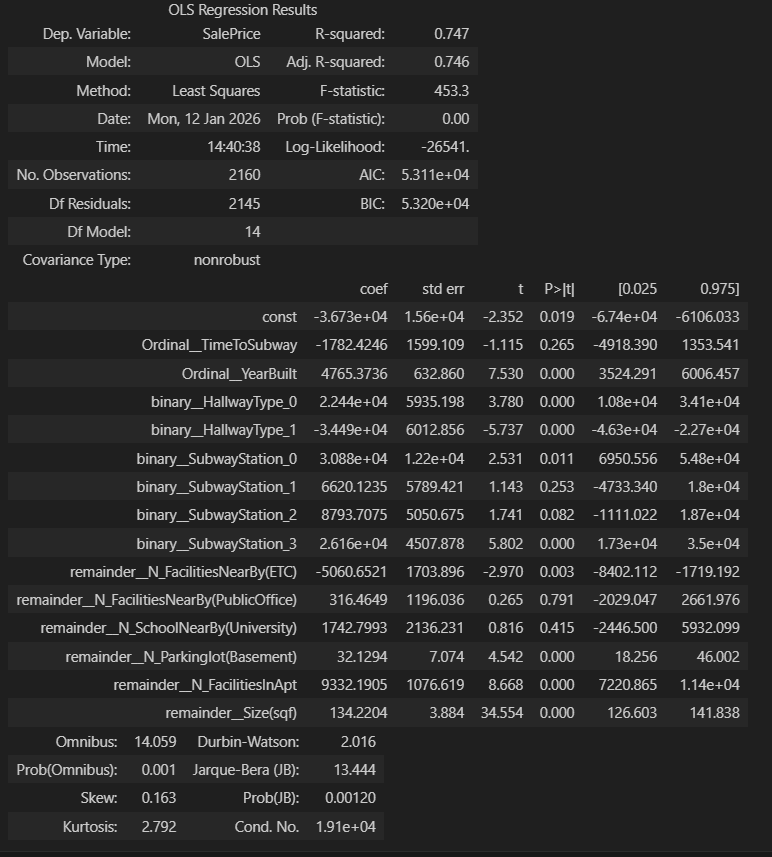

- **F-test** digunakan untuk melihat apakah **minimal ada 1 feature yang dapat mempengaruhi Harga apartemen (SalePrice)**.
    - H0 : Tidak ada 1 feature pun yang berpengaruh terhadap harga apartemen (SalePrice)
    - H1 : Minimal ada 1 feature yang berpengaruh terhadap harga apartemen (SalePrice)

    Karena nilai **Prob (F-statistic) sebesar 0.00, yaitu P value < 0.05 atau 5%**, maka menolak hipotesis H0. Artinya **minimal ada 1 feature diantara 10 feature ('HallwayType', 'TimeToSubway', 'SubwayStation', 'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)') yang berpengaruh terhadap Harga Apartemen (SalePrice)**.
    
- **T-test** digunakan untuk melihat lebih detail **apakah setiap featurenya berpengaruh terhadap Harga Apartemen (SalePrice)**. Nilai yang dilihat adalah P>|t|. Jika:
    
    P value > 0.05 atau 5%, maka menerima HO: feature tidak berpengaruh terhadap harga apartemen (SalePrice)
    
    P value < 0.05 atau 5%, maka menolak H0: feature berpengaruh terhadap harga apartemen (SalePrice)
    Hasil:
    - **const (0.019)** -> P-value <0.05, artinya: **Constanta berpengaruh signifikan terhadap SalePrice**
    - **TimeToSubway (0.265)** -> P-value >0.05, artinya: **TimeToSubway tidak berpengaruh signifikan terhadap SalePrice**
    - **YearBuilt (0.000)** -> P-value >0.05, artinya: **YearBuilt berpengaruh signifikan terhadap SalePrice**
    - **HallwayType_0 (0.000)** -> P-value <0.05, artinya: **HallwayType_0 berpengaruh signifikan terhadap SalePrice**
    - **HallwayType_1 (0.000)** -> P-value <0.05, artinya: **HallwayType_1 berpengaruh signifikant terhadap SalePrice**
    - **SubwayStation_0 (0.011)** -> P-value <0.05, artinya: **SubwayStation berpengaruh signifikan terhadap SalePrice**
    - **SubwayStation_1 (0.253)** -> P-value >0.05, artinya: **SubwayStation tidak berpengaruh signifikan terhadap SalePrice**
    - **SubwayStation_2 (0.082)** -> P-value >0.05, artinya: **SubwayStation tidak berpengaruh signifikan terhadap SalePrice**
    - **SubwayStation_3 (0.000)** -> P-value <0.05, artinya: **SubwayStation berpengaruh signifikan terhadap SalePrice**
    - **N_FacilitiesNearBy(ETC) (0.003)** -> P-value <0.05, artinya: **N_FacilitiesNearBy(ETC) berpengaruh signifikan terhadap SalePrice**
    - **N_FacilitiesNearBy(PublicOffice) (0.791)** -> P-value >0.05, artinya: **N_FacilitiesNearBy(PublicOffice) tidak berpengaruh signifikan terhadap SalePrice**
    - **N_SchoolNearBy(University) (0.415)** -> P-value >0.05, artinya: **N_SchoolNearBy(University) tidak berpengaruh signifikan terhadap SalePrice**
    - **N_Parkinglot(Basement) (0.000)** -> P-value <0.05, artinya: **N_Parkinglot(Basement) berpengaruh signifikan terhadap SalePrice**
    - **N_FacilitiesInApt (0.000)** -> P-value <0.05, artinya: **N_FacilitiesInApt berpengaruh signifikan terhadap SalePrice**
    - **Size(sqf) (0.000)** -> P-value <0.05, artinya: **Size(sqf) berpengaruh signifikan terhadap SalePrice**

**Rumus MultiLinear Regression**

SalePrice^=β0 ​+ β1​(TimeToSubway) + β2​(YearBuilt) + β3​(HallwayType_0) + β4​(HallwayType_1) + β5​(SubwayStation_0) + β6​(SubwayStation_1) + β7​(SubwayStation_2) + β8​(SubwayStation_3) + β9​(N_FacilitiesNearBy(ETC)) + β10​(N_FacilitiesNearBy(PublicOffice)) + β11​(N_SchoolNearBy(University)) + β12​(N_Parkinglot(Basement)) + β13​(N_FacilitiesInApt) + β14​(Size(sqf))

**Jadi**

SalePrice = - 36,730 ​- 1,782​(TimeToSubway) + 4,765​(YearBuilt) + 22,440​(HallwayType_0) - 34,490​(HallwayType_1) + 30,880​(SubwayStation_0) + 6,620​(SubwayStation_1) + 8,793​(SubwayStation_2) + 26,160​(SubwayStation_3) - 5,060​(N_FacilitiesNearBy(ETC)) + 316​(N_FacilitiesNearBy(PublicOffice)) + 1,742​(N_SchoolNearBy(University)) + 32​(N_Parkinglot(Basement)) + 9,332​(N_FacilitiesInApt) + 134(Size(sqf))

#### **Mapping untuk TimeToSubway, YearBuilt, HallwayType dan SubwayStation**

In [49]:
# ambil data kategori asli dari TimeToSubway
cats = X_train['TimeToSubway'].astype('category').cat.categories

# buat mapping manual
label_map = {cat: i+1 for i, cat in enumerate(cats)}
label_map

{'0-5min': 1,
 '5min~10min': 2,
 '10min~15min': 3,
 '15min~20min': 4,
 'no_bus_stop_nearby': 5}

In [50]:
# ambil data kategori asli dari YearBuilt
cats = X_train['YearBuilt'].astype('category').cat.categories

# buat mapping manual
label_map = {cat: i+1 for i, cat in enumerate(cats)}
label_map

{1978: 1,
 1980: 2,
 1985: 3,
 1986: 4,
 1992: 5,
 1993: 6,
 1997: 7,
 2003: 8,
 2005: 9,
 2006: 10,
 2007: 11,
 2008: 12,
 2009: 13,
 2013: 14,
 2014: 15,
 2015: 16}

In [51]:
# ambil data kategori asli dari SubwayStation
cats = X_train['SubwayStation'].astype('category').cat.categories

# buat mapping manual
label_map = {cat: i+1 for i, cat in enumerate(cats)}
label_map

{'Bangoge': 1,
 'Banwoldang': 2,
 'Chil-sung-market': 3,
 'Daegu': 4,
 'Kyungbuk_uni_hospital': 5,
 'Myung-duk': 6,
 'Sin-nam': 7,
 'no_subway_nearby': 8}

In [52]:
# ambil data kategori asli dari HallwayType
cats = X_train['HallwayType'].astype('category').cat.categories

# buat mapping manual
label_map = {cat: i+1 for i, cat in enumerate(cats)}
label_map

{'corridor': 1, 'mixed': 2, 'terraced': 3}

In [53]:
# ambil binary encoder dari ColumnTransformer
bin_encoder = transformer.named_transformers_['binary']

# lihat mapping internal
bin_encoder.mapping


[{'col': 'HallwayType',
  'mapping':     HallwayType_0  HallwayType_1
   1              0              1
   2              1              0
   3              1              1
  -1              0              0
  -2              0              0},
 {'col': 'SubwayStation',
  'mapping':     SubwayStation_0  SubwayStation_1  SubwayStation_2  SubwayStation_3
   1                0                0                0                1
   2                0                0                1                0
   3                0                0                1                1
   4                0                1                0                0
   5                0                1                0                1
   6                0                1                1                0
   7                0                1                1                1
   8                1                0                0                0
  -1                0                0                0    

#### **Contoh Penggunaan Rumus Multilinear Regressi**
Untuk TimeToSubway, YearBuilt, HallwayType dan SubwayStation cara mengisinya mengikuti binnary mapping, selain itu dapat memasukkan angka sesuai data aslinya

In [55]:
# Mengambil data random untuk melihat cara kerja rumus regresi linear
df_2.loc[5]

HallwayType                                    mixed
TimeToSubway                             15min~20min
SubwayStation                       Chil-sung-market
N_FacilitiesNearBy(ETC)                            1
N_FacilitiesNearBy(PublicOffice)                   7
N_SchoolNearBy(University)                         3
N_Parkinglot(Basement)                            56
YearBuilt                                       1997
N_FacilitiesInApt                                  5
Size(sqf)                                        558
SalePrice                                     118584
Name: 5, dtype: object

**Menghitung prediksi SalePrice menggunakan model Machine Learning Multilinear Regressi**

SalePrice = - 36,730 ​- 1,782​(TimeToSubway) + 4,765​(YearBuilt) + 22,440​(HallwayType_0) - 34,490​(HallwayType_1) + 30,880​(SubwayStation_0) + 6,620​(SubwayStation_1) + 8,793​(SubwayStation_2) + 26,160​(SubwayStation_3) - 5,060​(N_FacilitiesNearBy(ETC)) + 316​(N_FacilitiesNearBy(PublicOffice)) + 1,742​(N_SchoolNearBy(University)) + 32​(N_Parkinglot(Basement)) + 9,332​(N_FacilitiesInApt) + 134(Size(sqf))

SalePrice = - 36,730 ​- 1,782​(4) + 4,765​(7) + 22,440​(1) - 34,490​(0) + 30,880​(0) + 6,620​(0) + 8,793(​1) + 26,160​(1) - 5,060​(1) + 316​(7) + 1,742​(3) + 32​(56) + 9,332​(5) + 134(558)
SalePrice = - 36,730 ​- 7,128 + 33,355 + 22,440​ - 0 + 0 + 0 + 8,793 + 26,160 - 5,060 + 2,212 + 5,226 + 1,792 + 46,660 + 74,772
SalePrice = 172,492 Korean Won

**Bandingkan Hasil Prediksi dengan Data asli (baris ke-5 dari data)**

Error/residu = 172,492 - 118,584 = **53,908 Korean Won** ----> **kurang lebih sama dengan hasil prediksi perbedaan sekitar +/-51,332.13 Korean Won**

# Penutup

Perlu diperhatikan bahwa model Machine Learning yang digunakan dalam penelitian ini hanya mampu menjelaskan variasi harga apartemen sebesar **77,14%**. Artinya, meskipun model telah mempelajari berbagai faktor yang memengaruhi harga, masih terdapat sekitar **22,86%** variasi harga yang dipengaruhi oleh faktor-faktor lain di luar cakupan model.

Beberapa faktor tersebut berada di luar kemampuan Machine Learning untuk diprediksi secara langsung, salah satunya adalah **kondisi makroekonomi**. Sektor apartemen termasuk ke dalam segmen properti yang memiliki hubungan sangat erat dengan dinamika makroekonomi. Hal ini terjadi karena sebagian besar masyarakat membeli apartemen melalui skema cicilan bank, sehingga pergerakan harga properti sangat dipengaruhi oleh kebijakan di sektor keuangan.

Cicilan bank berkaitan erat dengan tingkat suku bunga pinjaman, yang pada umumnya ditetapkan dan diatur melalui kebijakan pemerintah dan bank sentral. Kebijakan mengenai kenaikan maupun penurunan suku bunga dapat berubah sewaktu-waktu, sesuai dengan tujuan pemerintah dalam menjaga stabilitas makroekonomi suatu negara.

Ketika kondisi makroekonomi berada dalam keadaan yang baik—misalnya ketika masyarakat dapat dengan mudah memperoleh pinjaman dengan suku bunga yang rendah—permintaan terhadap properti cenderung meningkat. Peningkatan permintaan ini pada akhirnya dapat mendorong kenaikan harga apartemen, bahkan berpotensi melampaui nilai pasar wajar. Sebaliknya, ketika kondisi ekonomi melemah dan suku bunga meningkat, daya beli masyarakat terhadap properti akan menurun, yang kemudian dapat menekan harga apartemen.

Oleh karena itu, penting untuk disadari bahwa hasil prediksi dari model Machine Learning tidak dapat dijadikan satu-satunya acuan dalam menentukan harga apartemen. Prediksi tersebut perlu dikombinasikan dengan analisis kondisi makroekonomi serta pemahaman terhadap tren pasar properti terkini, agar keputusan yang diambil menjadi lebih akurat dan relevan dengan situasi nyata di lapangan.

source:
- https://world.kbs.co.kr/service/news_view.htm?Seq_Code=197395&lang=e
- https://world.kbs.co.kr/service/news_view.htm?Seq_Code=193967&lang=e&utm_source=chatgpt.com
- https://www.koreatimes.co.kr/economy/policy/20260112/bok-expected-to-keep-interest-rate-unchanged-this-week-poll
